In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch.nn import functional as F
from matplotlib import pyplot as plt

import optiacts

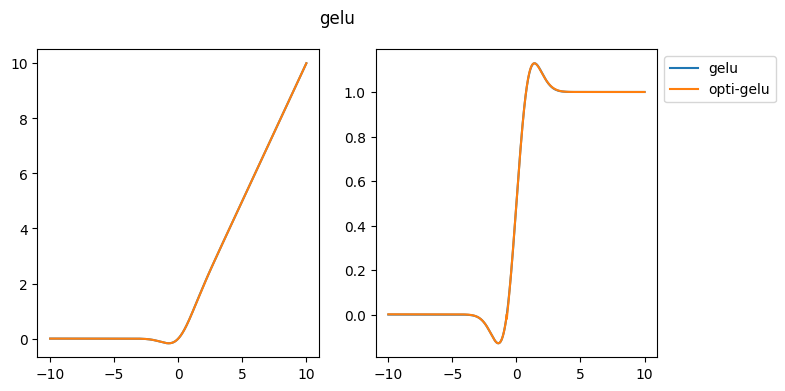

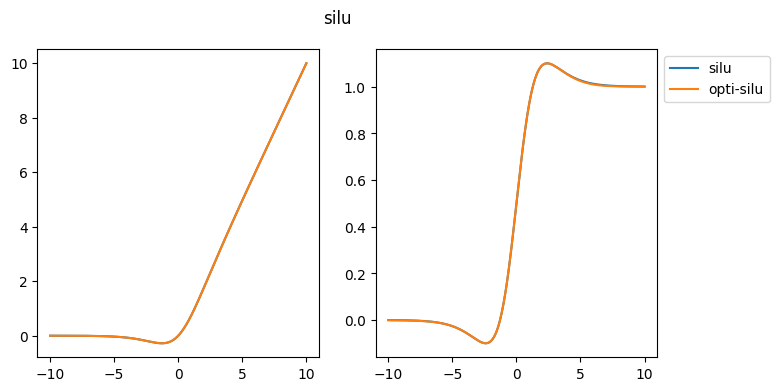

In [3]:
for true_fn, approx_fn in [(F.gelu, optiacts.gelu), (F.silu, optiacts.silu)]:
    xs_true = torch.linspace(-10, 10, 2 ** 20, requires_grad=True)
    ys_true = true_fn(xs_true)
    ys_true.sum().backward()

    xs_approx = torch.linspace(-10, 10, 2 ** 20, requires_grad=True, dtype=torch.double)
    ys_approx = approx_fn(xs_approx)
    ys_approx.sum().backward()
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(xs_true.detach().numpy(), ys_true.detach().numpy())
    axs[0].plot(xs_approx.detach().numpy(), ys_approx.detach().numpy())
    axs[1].plot(xs_true.detach().numpy(), xs_true.grad.detach().numpy(), label=true_fn.__name__)
    axs[1].plot(xs_approx.detach().numpy(), xs_approx.grad.detach().numpy(), label=f'opti-{true_fn.__name__}')
    fig.suptitle(true_fn.__name__)
    plt.legend(loc='upper left', bbox_to_anchor=(1., 1.))
    plt.show()